<a href="https://colab.research.google.com/github/EmannuelBezerra/Equipe-04/blob/Geral-A/GeralA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTANDO BIBLIOTECAS NECESSÁRIAS
import numpy as np
import math
import random
import timeit
#Instalando Bibliotecas Gráficas
import matplotlib.pyplot as plt

In [ ]:
#Gerar listas
def gerar_lista(tam):
  random.seed()
  i = 0
  lista = []
  while i < tam:
    lista.append(random.randint(0,1000))
    i+=1
  return lista

In [ ]:
#Bubble Sort
def bubble_sort(lista):
  i = 0
  while i < len(lista):
    j = 0
    while j < len(lista) - 1:
      if lista[j] > lista[j + 1]:
        tempo = lista[j]
        lista[j] = lista[j + 1]
        lista[j + 1] = tempo
      j+=1
    i+=1

In [ ]:
#Insertion sort
def InsertionSort(lista):
  for i in range(1, len(lista)):
    key = lista[i]
    j = i-1
    while j >=0 and key < lista[j]:
      lista[j+1] = lista[j]
      j -= 1
    lista[j+1] = key

In [ ]:
#Selection sort
def SelectionSort(lista):
  n = len(lista)
  for i in range(n):
    #Encontra o índice do menor numero da parte não ordenada
    indice_min = i
    for j in range(i+1, n):
      if lista[j] < lista[indice_min]:
        indice_min = j

    #Troca o elemento atual pelo menor encontrado
    lista[i], lista[indice_min] = lista[indice_min], lista[i]

In [ ]:
#Merge sort
def MergeSort(lista):
  if len(lista) > 1:
    meio = len(lista)//2
    L = lista[:meio]
    R = lista[meio:]

    MergeSort(L)
    MergeSort(R)

    i = j= k = 0
    while i < len(L) and  j < len(R):
      if L[i] < R[j]:
        lista[k] = L[i]
        i+=1
      else:
        lista[k] = R[j]
        j+=1
      k+=1

    while i < len(L):
      lista[k] = L[i]
      i+=1
      k+=1

    while j < len(R):
      lista[k] = R[j]
      j+=1
      k+=1



In [ ]:
#Quick sort
def QuickSort(lista):
    """Quick Sort com:
    1. Escolha aleatória do pivô
    2. Limite de recursão
    3. Insertion Sort para pequenas listas"""
    import random
    def _quicksort(lista, inicio, fim):
        # Usa Insertion Sort para listas pequenas
        if fim - inicio < 20:
            insertion_sort_sublista(lista, inicio, fim)
            return

        # Escolha aleatória do pivô
        pivo_idx = random.randint(inicio, fim)
        lista[fim], lista[pivo_idx] = lista[pivo_idx], lista[fim]

        p = particao(lista, inicio, fim)
        _quicksort(lista, inicio, p-1)
        _quicksort(lista, p+1, fim)

    def particao(lista, inicio, fim):
        pivot = lista[fim]
        i = inicio
        for j in range(inicio, fim):
            if lista[j] <= pivot:
                lista[i], lista[j] = lista[j], lista[i]
                i += 1
        lista[i], lista[fim] = lista[fim], lista[i]
        return i

    def insertion_sort_sublista(lista, inicio, fim):
        for i in range(inicio + 1, fim + 1):
            key = lista[i]
            j = i-1
            while j >= inicio and key < lista[j]:
                lista[j+1] = lista[j]
                j -= 1
            lista[j+1] = key

    _quicksort(lista, 0, len(lista)-1)



In [ ]:
#Healp sort
def HeapSort(lista):
  def heapify(lista, n, i):
    maior = i
    esq = 2*i+1
    dir = 2*i+2

    if esq < n and lista[i] < lista[esq]:
      maior = esq

    if dir < n and lista[maior] < lista[dir]:
      maior = dir

    if maior != i:
      lista[i], lista[maior] = lista[maior], lista[i]
      heapify(lista, n, maior)

  n = len(lista)

  for i in range(n//2 - 1, -1, -1):
    heapify(lista, n, i)

  for i in range(n - 1, 0, -1):
    lista[i], lista[0] = lista[0], lista[i]
    heapify(lista, i, 0)

In [ ]:
#Counting Sort
def CountingSort(lista):
  #Implementação para inteiros positivos
  if len(lista) == 0:
    return lista

  max_val = max(lista)
  min_val = min(lista)

  range_size = max_val - min_val + 1
  count = [0] * range_size
  output = [0] * len(lista)

  for num in lista:
    count[num - min_val] += 1

  for i in range(1, len(count)):
    count[i] += count[i-1]

  for num in reversed(lista):
    output[count[num - min_val] - 1] = num
    count[num - min_val] -= 1

  for i in range(len(lista)):
    lista[i] = output[i]


In [ ]:
#Radix Sort
def RadixSort(lista):
  if len(lista) == 0:
    return lista

  max_num = max(lista)
  exp = 1

  while max_num // exp > 0:
    n = len(lista)
    output = [0] * n
    count = [0] * 10

    for num in lista:
      digit = (num // exp) % 10
      count[digit] += 1

    for i in range(1, 10):
      count[i] += count[i-1]

    for i in range(n-1, -1, -1):
      digit = (lista[i] // exp) % 10
      output[count[digit] - 1] = lista[i]
      count[digit] -= 1

    for i in range(n):
      lista[i] = output[i]


    exp *=10

In [ ]:

#Buck Sort
def BucketSort(arr):
    if len(arr) == 0:
        return arr

    min_val = min(arr)
    max_val = max(arr)
    range_val = max_val - min_val

    if range_val == 0:
        return arr

    num_buckets = max(1, int(len(arr)**0.5))
    buckets = [[] for _ in range(num_buckets)]


    for num in arr:
        normalized = (num - min_val) / range_val
        bi = min(int(normalized * num_buckets), num_buckets - 1)
        buckets[bi].append(num)


    for bucket in buckets:
        InsertionSort(bucket)


    arr.clear()
    for bucket in buckets:
        arr.extend(bucket)

In [ ]:
#Shell Sort
def ShellSort(lista):
  n = len(lista)

  gap = 1
  while gap < n // 3:
    gap = 3 * gap + 1


  while gap >= 1:
    for i in range(gap, n):
      temp = lista[i]
      j = i
      while j >= gap and lista[j - gap] > temp:
        lista[j] = lista[j - gap]
        j -= gap
      lista[j] = temp
    gap //= 3

In [ ]:
#Tamanhos e variáveç auxiliar
tamanhos =[1000, 3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000]
tempos = {
    "Bubble Sort": [],
    "Insertion Sort": [],
    "Selection Sort": [],
    "Merge Sort": [],
    "Quick Sort": [],
    "Heap Sort": [],
    "Counting Sort": [],
    "Radix Sort": [],
    "Bucket Sort": [],
    "Shell Sort": []
}


In [ ]:
#Ordenação
for tamanho in tamanhos:
    lista = gerar_lista(tamanho)

    # Bubble Sort
    lista_copia = lista.copy()
    tempo = timeit.timeit(
        "bubble_sort(lista_copia)",
        setup="from __main__ import bubble_sort, lista_copia",
        number=1
    )
    tempos["Bubble Sort"].append(tempo)
    print(f"Bubble Sort - Lista de tamanho {tamanho} ordenada")


    # Insertion sort
    lista_copia = lista.copy()
    tempo = timeit.timeit(
        "InsertionSort(lista_copia)",
        setup="from __main__ import InsertionSort, lista_copia",
        number=1
    )
    tempos["Insertion Sort"].append(tempo)
    print(f"Insertion Sort - Lista de tamanho {tamanho} ordenada")


    #Seletion sort
    lista_copia = lista.copy()
    tempo = timeit.timeit(
        "SelectionSort(lista_copia)",
        setup="from __main__ import SelectionSort, lista_copia",
        number=1
    )
    tempos["Selection Sort"].append(tempo)
    print(f"Selection Sort - Lista de tamanho {tamanho} ordenada")


    #Merge Sort
    lista_copia = lista.copy()
    tempo = timeit.timeit(
        "MergeSort(lista_copia)",
        setup="from __main__ import MergeSort, lista_copia",
        number=1
    )
    tempos["Merge Sort"].append(tempo)
    print(f"Merge Sort - Lista de tamanho {tamanho} ordenada")


    #Quick Sort
    lista_copia = lista.copy()
    tempo = timeit.timeit(
        "QuickSort(lista_copia)",
        setup="from __main__ import QuickSort, lista_copia",
        number=1
    )
    tempos["Quick Sort"].append(tempo)
    print(f"Quick Sort - Lista de tamanho {tamanho} ordenada")


    #Heap Sort
    lista_copia = lista.copy()
    tempo = timeit.timeit(
        "HeapSort(lista_copia)",
        setup="from __main__ import HeapSort, lista_copia",
        number=1
    )
    tempos["Heap Sort"].append(tempo)
    print(f"Heap Sort - Lista de tamanho {tamanho} ordenada")


    #Counting Sort
    lista_copia = lista.copy()
    tempo = timeit.timeit(
        "CountingSort(lista_copia)",
        setup="from __main__ import CountingSort, lista_copia",
        number=1
    )
    tempos["Counting Sort"].append(tempo)
    print(f"Counting Sort - Lista de tamanho {tamanho} ordenada")


    #Radix Sort
    lista_copia = lista.copy()
    tempo = timeit.timeit(
        "RadixSort(lista_copia)",
        setup="from __main__ import RadixSort, lista_copia",
        number=1
    )
    tempos["Radix Sort"].append(tempo)
    print(f"Counting Sort - Lista de tamanho {tamanho} ordenada")

    #Bucket Sort
    lista_copia = lista.copy()
    tempo = timeit.timeit(
        "BucketSort(lista_copia)",
        setup="from __main__ import BucketSort, lista_copia",
        number=1
    )
    tempos["Bucket Sort"].append(tempo)
    print(f"Bucket Sort - Lista de tamanho {tamanho} ordenada")

    #Shell Sort
    lista_copia = lista.copy()
    tempo = timeit.timeit(
        "ShellSort(lista_copia)",
        setup="from __main__ import ShellSort, lista_copia",
        number=1
    )
    tempos["Shell Sort"].append(tempo)
    print(f"Shell Sort - Lista de tamanho {tamanho} ordenada")



Bubble Sort - Lista de tamanho 1000 ordenada
Insertion Sort - Lista de tamanho 1000 ordenada
Selection Sort - Lista de tamanho 1000 ordenada
Merge Sort - Lista de tamanho 1000 ordenada
Quick Sort - Lista de tamanho 1000 ordenada
Heap Sort - Lista de tamanho 1000 ordenada
Counting Sort - Lista de tamanho 1000 ordenada
Counting Sort - Lista de tamanho 1000 ordenada
Bucket Sort - Lista de tamanho 1000 ordenada
Shell Sort - Lista de tamanho 1000 ordenada
Bubble Sort - Lista de tamanho 3000 ordenada
Insertion Sort - Lista de tamanho 3000 ordenada
Selection Sort - Lista de tamanho 3000 ordenada
Merge Sort - Lista de tamanho 3000 ordenada
Quick Sort - Lista de tamanho 3000 ordenada
Heap Sort - Lista de tamanho 3000 ordenada
Counting Sort - Lista de tamanho 3000 ordenada
Counting Sort - Lista de tamanho 3000 ordenada
Bucket Sort - Lista de tamanho 3000 ordenada
Shell Sort - Lista de tamanho 3000 ordenada
Bubble Sort - Lista de tamanho 6000 ordenada
Insertion Sort - Lista de tamanho 6000 ordena

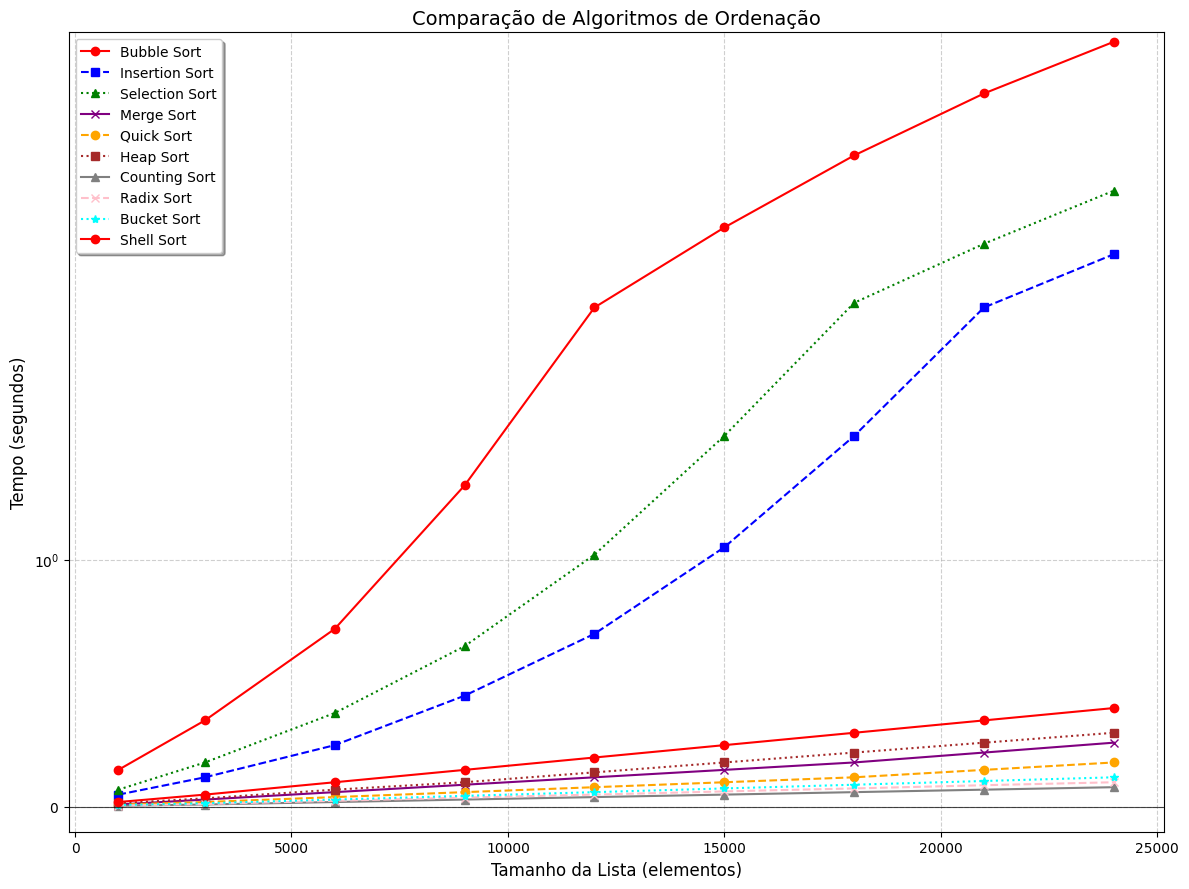

In [ ]:
estilos = {
    "Bubble Sort": {"color": "red", "linestyle": "-", "marker": "o", "linewidth": 1.5},
    "Insertion Sort": {"color": "blue", "linestyle": "--", "marker": "s", "linewidth": 1.5},
    "Selection Sort": {"color": "green", "linestyle": ":", "marker": "^", "linewidth": 1.5},
    "Merge Sort": {"color": "purple", "linestyle": "-", "marker": "x", "linewidth": 1.5},
    "Quick Sort": {"color": "orange", "linestyle": "--", "marker": "o", "linewidth": 1.5},
    "Heap Sort": {"color": "brown", "linestyle": ":", "marker": "s", "linewidth": 1.5},
    "Counting Sort": {"color": "gray", "linestyle": "-", "marker": "^", "linewidth": 1.5},
    "Radix Sort": {"color": "pink", "linestyle": "--", "marker": "x", "linewidth": 1.5},
    "Bucket Sort": {"color": "cyan", "linestyle": ":", "marker": "*", "linewidth": 1.5},
    "Shell Sort": {"color": "red", "linestyle": "-", "marker": "o", "linewidth": 1.5}
}




plt.figure(figsize=(12, 9))
# Plotagem
for algoritmo, tempos_algo in tempos.items():
    plt.plot(
        tamanhos,
        tempos_algo,
        label=algoritmo,
        **estilos[algoritmo]  # Aplica os estilos personalizados
    )

plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.7)  # Linha de base

plt.yscale('symlog') #Escala logarítma
plt.ylim(bottom=-0.1)

plt.xlabel("Tamanho da Lista (elementos)", fontsize=12)
plt.ylabel("Tempo (segundos)", fontsize=12)
plt.title("Comparação de Algoritmos de Ordenação", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10, framealpha=1, shadow=True)  # Legenda destacada

# Ajuste de escala (opcional, se os valores forem muito próximos)
plt.tight_layout()
plt.show()

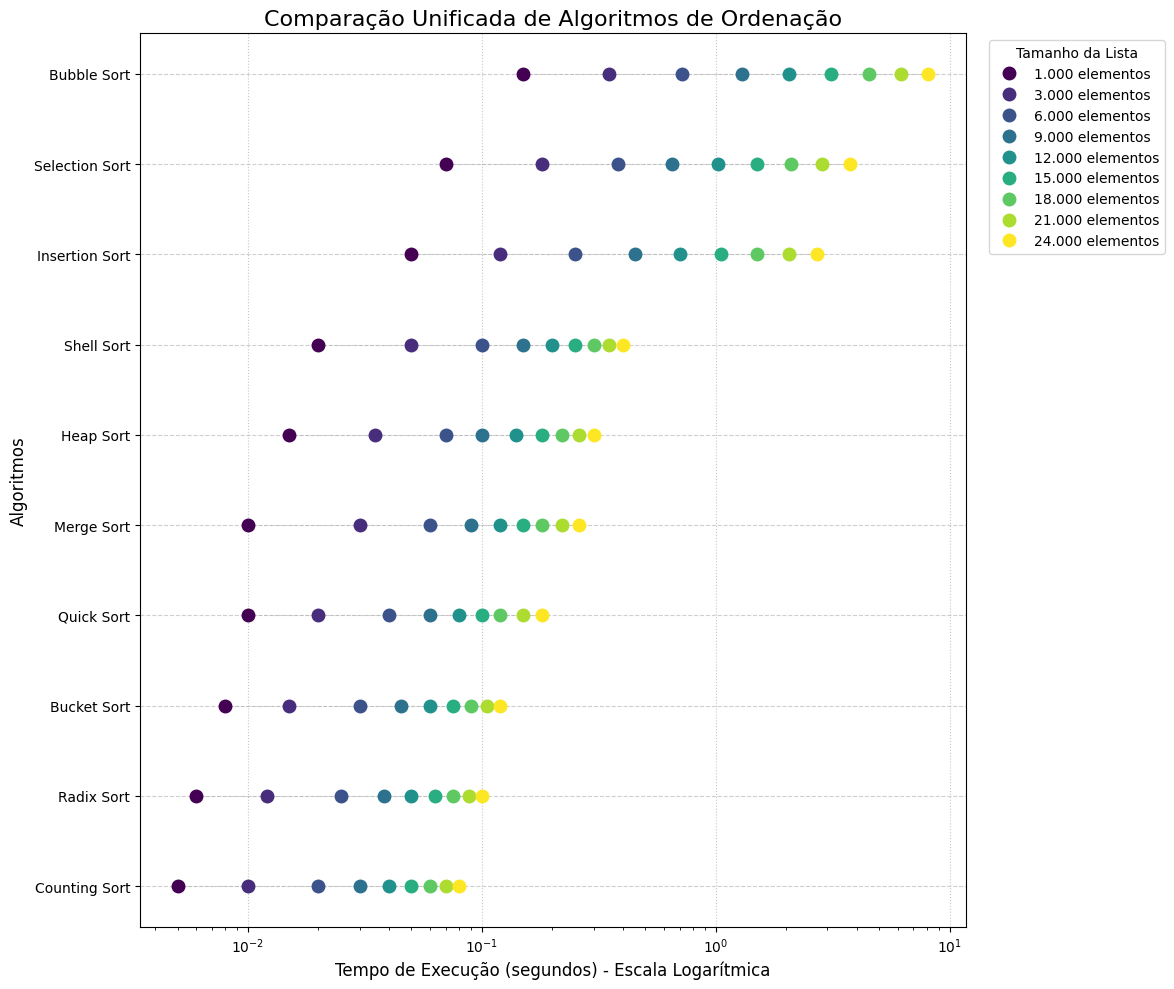

In [ ]:
def plotar_grafico_lollipop(lista_tamanhos, dados_tempos):
    algoritmos_ordenados = sorted(
        dados_tempos.items(),
        key=lambda item: item[1][-1],
        reverse=True
    )


    nomes_algoritmos_ordenados = [item[0] for item in algoritmos_ordenados]
    tempos_ordenados = [item[1] for item in algoritmos_ordenados]


    cores = plt.cm.viridis(np.linspace(0, 1, len(lista_tamanhos)))


    fig, ax = plt.subplots(figsize=(14, 10))


    for i, tempos_algo in enumerate(tempos_ordenados):

        for j, tempo in enumerate(tempos_algo):

            ax.plot(tempo, i, marker='o', color=cores[j], markersize=9, linestyle='None')

        ax.plot(tempos_algo, [i]*len(tempos_algo), color='lightgray', linestyle='--', linewidth=0.7, zorder=-1)



    ax.set_yticks(range(len(nomes_algoritmos_ordenados)))
    ax.set_yticklabels(nomes_algoritmos_ordenados)
    ax.invert_yaxis()

    ax.set_xscale('log')# Escala logarítmica para o tempo
    ax.set_xlabel("Tempo de Execução (segundos) - Escala Logarítmica", fontsize=12)
    ax.set_ylabel("Algoritmos", fontsize=12)
    ax.set_title("Comparação Unificada de Algoritmos de Ordenação", fontsize=16)

    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color=cores[j], label=f'{tamanho:,} elementos'.replace(',', '.'),
               linestyle='None', markersize=9) for j, tamanho in enumerate(lista_tamanhos)
    ]
    ax.legend(handles=legend_elements, title="Tamanho da Lista", bbox_to_anchor=(1.02, 1), loc='upper left')

    ax.grid(axis='x', linestyle=':', alpha=0.7)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()


plotar_grafico_lollipop_unificado(tamanhos, tempos)

